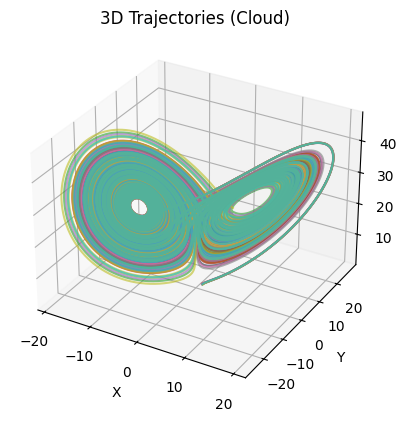

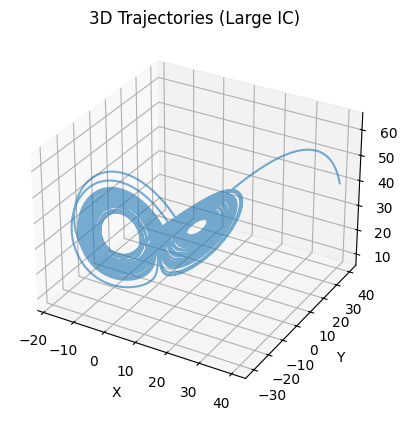

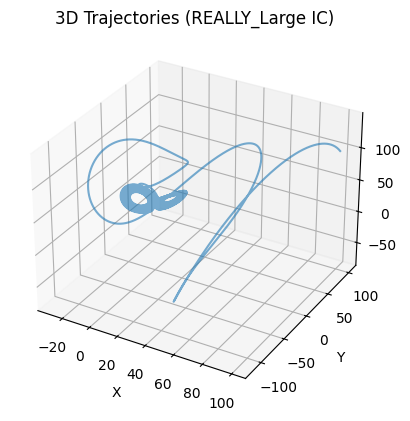

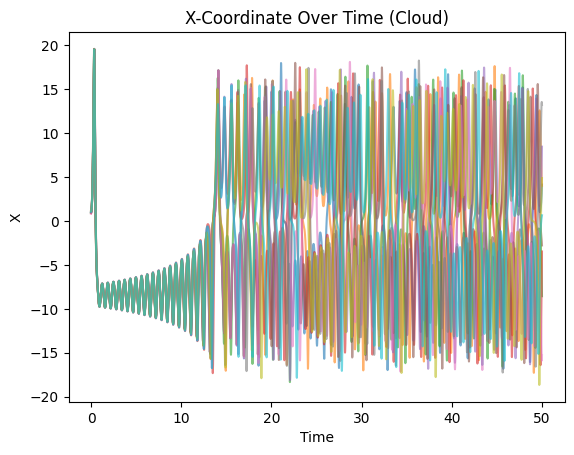

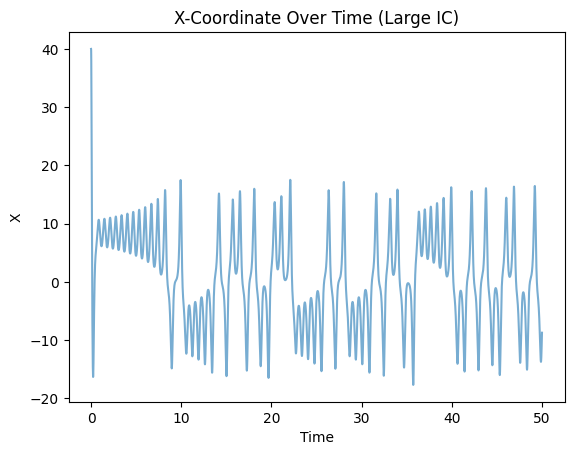

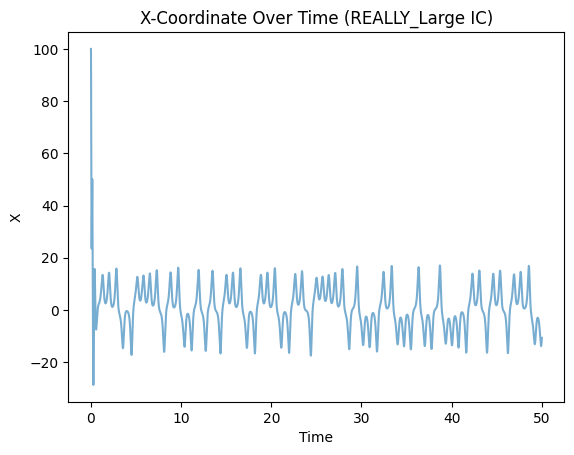

In [ ]:
#@title 2D Plots

import numpy as np
import matplotlib.pyplot as plt

sigma = 10.0
beta = 8 / 3
rho = 28.0

dt = 0.0001
t_max = 50.0
t_steps = int(t_max / dt)
time = np.linspace(0, t_max, t_steps)

def lorenz_system(state, sigma, beta, rho):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

def integrate_lorenz(initial_condition, sigma, beta, rho, dt, t_steps):
    trajectory = np.zeros((t_steps, 3))
    trajectory[0] = initial_condition
    for i in range(1, t_steps):
        state = trajectory[i - 1]
        trajectory[i] = state + dt * lorenz_system(state, sigma, beta, rho)
    return trajectory

# Initialize a cloud of initial conditions near (1, 1, 1)
num_initial_conditions = 10
initial_conditions = np.random.normal(loc=1.0, scale=0.1, size=(num_initial_conditions, 3))
large_initial_conditions = [np.array([40.0, 40.0, 40.0])]
REALLY_large_initial_conditions = [np.array([100.0, 100.0, 100.0])]

trajectories = [integrate_lorenz(ic, sigma, beta, rho, dt, t_steps) for ic in initial_conditions]
large_trajectories = [integrate_lorenz(ic, sigma, beta, rho, dt, t_steps) for ic in large_initial_conditions]
REALLY_large_trajectories = [integrate_lorenz(ic, sigma, beta, rho, dt, t_steps) for ic in REALLY_large_initial_conditions]

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for trajectory in trajectories:
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], alpha=0.6)
ax.set_title("3D Trajectories (Cloud)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for trajectory in large_trajectories:
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], alpha=0.6, label='Large IC')
ax.set_title("3D Trajectories (Large IC)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for trajectory in REALLY_large_trajectories:
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], alpha=0.6, label='Large IC')
ax.set_title("3D Trajectories (REALLY_Large IC)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

plt.figure()
for trajectory in trajectories:
    plt.plot(time, trajectory[:, 0], alpha=0.6)
plt.title("X-Coordinate Over Time (Cloud)")
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

plt.figure()
for trajectory in large_trajectories:
    plt.plot(time, trajectory[:, 0], alpha=0.6, label='Large IC')
plt.title("X-Coordinate Over Time (Large IC)")
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

plt.figure()
for trajectory in REALLY_large_trajectories:
    plt.plot(time, trajectory[:, 0], alpha=0.6, label='Large IC')
plt.title("X-Coordinate Over Time (REALLY_Large IC)")
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

In [ ]:
#@title 3D Plots

import plotly.io as pio
import plotly.graph_objects as go

# cloud
fig1 = go.Figure()
for trajectory in trajectories:
    fig1.add_trace(
        go.Scatter3d(
            x=trajectory[:, 0],
            y=trajectory[:, 1],
            z=trajectory[:, 2],
            mode='lines',
            line=dict(width=2),
        )
    )
fig1.update_layout(
    title="3D Trajectories for Initial Cloud (Interactive)",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig1.show()
pio.write_html(fig1, "initial_cloud_trajectories.html")

# large
fig2 = go.Figure()
for trajectory in large_trajectories:
    fig2.add_trace(
        go.Scatter3d(
            x=trajectory[:, 0],
            y=trajectory[:, 1],
            z=trajectory[:, 2],
            mode='lines',
            line=dict(width=2),
        )
    )
fig2.update_layout(
    title="3D Trajectories for Large Initial Conditions (Interactive)",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig2.show()
pio.write_html(fig2, "large_initial_conditions_trajectories.html")

# REALLY_large
fig3 = go.Figure()
for trajectory in REALLY_large_trajectories:
    fig3.add_trace(
        go.Scatter3d(
            x=trajectory[:, 0],
            y=trajectory[:, 1],
            z=trajectory[:, 2],
            mode='lines',
            line=dict(width=2),
        )
    )
fig3.update_layout(
    title="3D Trajectories for REALLY Large Initial Conditions (Interactive)",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig3.show()
pio.write_html(fig3, "REALLY_large_initial_conditions_trajectories.html")

In [ ]:
#@title Bonus: REALLY_Large Initial Condition gone WRONG under large time step

import numpy as np
import matplotlib.pyplot as plt

sigma = 10.0
beta = 8 / 3
rho = 28.0

dt = 0.01
t_max = 50.0
t_steps = int(t_max / dt)
time = np.linspace(0, t_max, t_steps)

def lorenz_system(state, sigma, beta, rho):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

def integrate_lorenz(initial_condition, sigma, beta, rho, dt, t_steps):
    trajectory = np.zeros((t_steps, 3))
    trajectory[0] = initial_condition
    for i in range(1, t_steps):
        state = trajectory[i - 1]
        trajectory[i] = state + dt * lorenz_system(state, sigma, beta, rho)
    return trajectory

REALLY_large_trajectories_wrong = [integrate_lorenz(ic, sigma, beta, rho, dt, t_steps) for ic in REALLY_large_initial_conditions]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for trajectory in REALLY_large_trajectories_wrong:
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], alpha=0.6, label='Large IC')
ax.set_title("REALLY_Large IC gone WRONG under large time step")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

plt.figure()
for trajectory in REALLY_large_trajectories_wrong:
    plt.plot(time, trajectory[:, 0], alpha=0.6, label='Large IC')
plt.title("REALLY_Large IC gone WRONG under large time step")
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

# REALLY_large_wrong
fig4 = go.Figure()
for trajectory in REALLY_large_trajectories_wrong:
    fig4.add_trace(
        go.Scatter3d(
            x=trajectory[:, 0],
            y=trajectory[:, 1],
            z=trajectory[:, 2],
            mode='lines',
            line=dict(width=2),
        )
    )
fig4.update_layout(
    title="3D Trajectories for REALLY Large IC gone WRONG under large time step",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig4.show()
pio.write_html(fig4, "REALLY_large_initial_conditions_wrong_trajectories.html")